In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import librosa
import librosa.display
import IPython.display as ipd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Kinds of Audio Features

In this section, I have chosen two opposite audios (happy and sad) to extract and examine their features.

In [3]:
happy_audio_path = '/kaggle/input/speech-emotion-recognition-en/Crema/1001_IEO_HAP_HI.wav'
sad_audio_path = '/kaggle/input/speech-emotion-recognition-en/Crema/1001_IEO_SAD_HI.wav'

This function takes a path as an input and shows its waveform and also plays the audio itself

In [4]:
def audio_display_and_waveshow(audio_path):
    au_obj = ipd.Audio(audio_path)
    audio, sr = librosa.load(audio_path)
    
    plt.figure(figsize=(10,6))
    librosa.display.waveshow(audio, alpha=0.7)
    plt.title(audio_path.split("/")[-1])
    plt.show()
    
    return au_obj

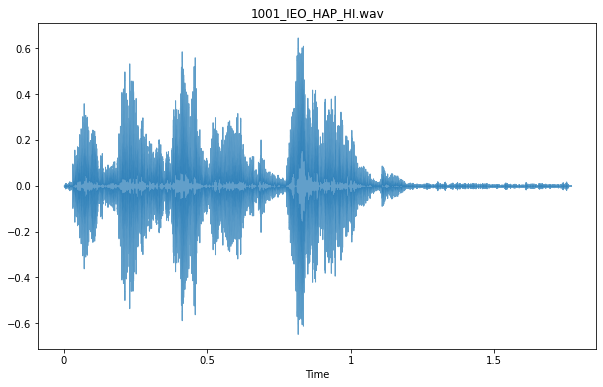

In [5]:
audio_display_and_waveshow(happy_audio_path)

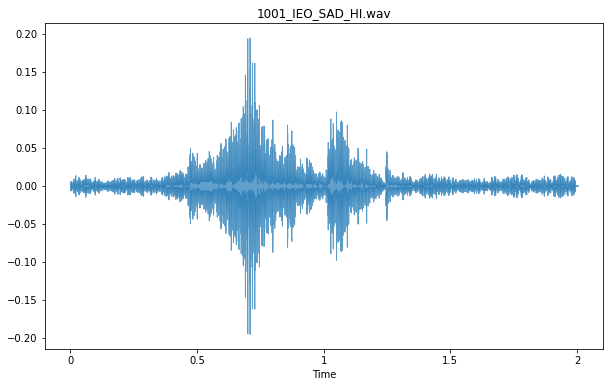

In [6]:
audio_display_and_waveshow(sad_audio_path)

**Amplitude Envelope Feature**


This is a function for extracting the amplitude envelope feature of audio; It takes a path, frame size and hop length as inputs and return amplitude envelope values. It also plots the wave of audio and its amplitude envelope feature.

In [7]:
def Amplitude_Envelope(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path)
    amplitude_envelope = np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_len)])
    
    frames = range(0, len(amplitude_envelope))
    times = librosa.frames_to_time(frames, hop_length = hop_len)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, amplitude_envelope, color='r')
        plt.title(audio_path.split("/")[-1] + " Amplitude Envelope")
        plt.show()
    
    return amplitude_envelope

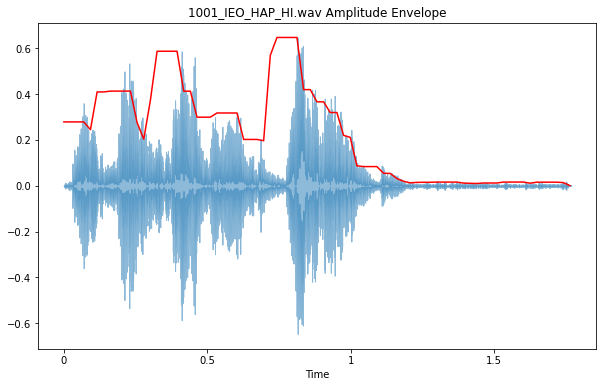

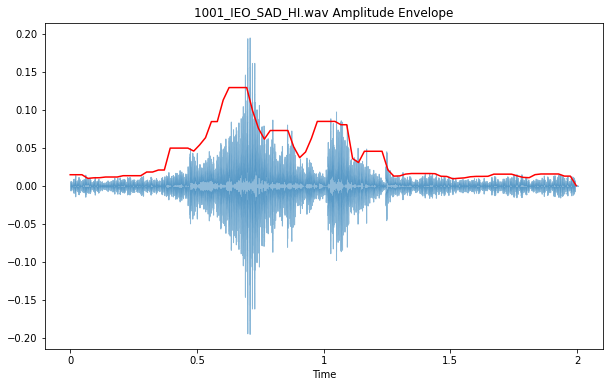

In [8]:
happy_AE = Amplitude_Envelope(happy_audio_path, frame_size=2048, hop_len=512)
sad_AE = Amplitude_Envelope(sad_audio_path, frame_size=2048, hop_len=512)

**Root Mean Square Energy Feature**


This is a function for extracting the root mean square energy of audio; It takes a path, frame size and hop length as inputs and return root mean square energy values. It also plots the wave of audio and its root mean square energy feature.

In [9]:
def Root_Mean_Square_Energy(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path)
    rms_energy = librosa.feature.rms(signal, frame_length=frame_size, hop_length=hop_len)[0]
    
    frames = range(0, len(rms_energy))
    times = librosa.frames_to_time(frames, hop_length=hop_len)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, rms_energy, color='r')
        plt.title(audio_path.split("/")[-1] + " Root Mean Square Energy")
        plt.show()
    
    return rms_energy

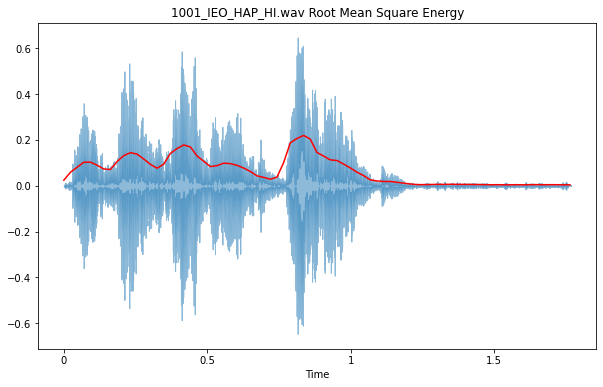

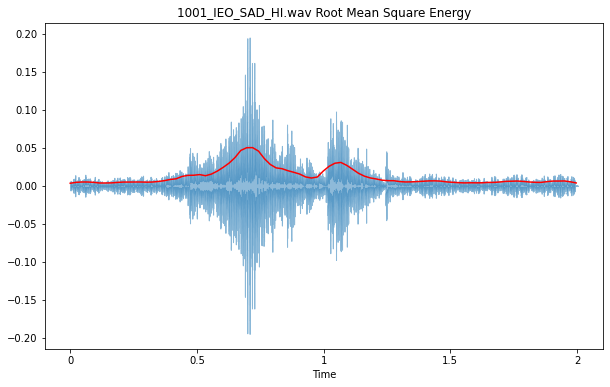

In [10]:
happy_rmse = Root_Mean_Square_Energy(happy_audio_path, frame_size=2048, hop_len=512)
sad_rmse = Root_Mean_Square_Energy(sad_audio_path, frame_size=2048, hop_len=512)

**Zero Crossing Rate Feature**


This is a function for extracting the zero crossing rate of audio; It takes a path, frame size and hop length as inputs and return zero crossing rate values. It also plots the wave of audio and its zero crossing rate feature.

In [11]:
def Zero_Crossing_Rate(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path)
    zcr = librosa.feature.zero_crossing_rate(signal, frame_length=frame_size, hop_length=hop_len)[0]
    
    frames = range(0, len(zcr))
    times = librosa.frames_to_time(frames, hop_length=hop_len)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, zcr, color='r')
        plt.title(audio_path.split("/")[-1] + " Zero Crossing Rate")
        plt.show()
    
    return zcr

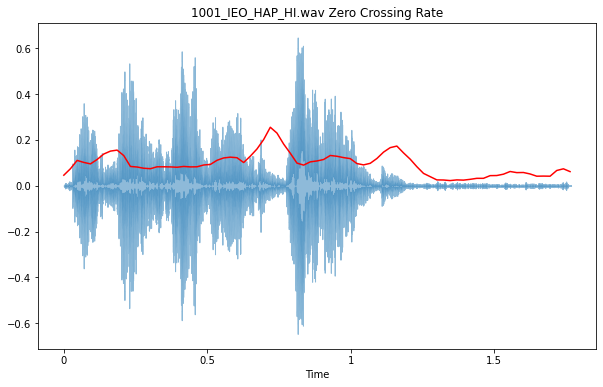

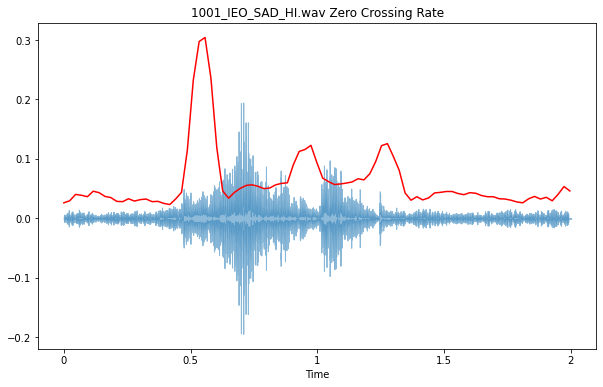

In [12]:
happy_zcr = Zero_Crossing_Rate(happy_audio_path, frame_size=2048, hop_len=512)
sad_zcr = Zero_Crossing_Rate(sad_audio_path, frame_size=2048, hop_len=512)

**Spectral Centroid Feature**


This is a function for extracting spectral centroid from a audio; It takes a path, frame size and hop length as inputs and return spectral centroid values as well as plotting the results.

In [13]:
def Spectral_Centroid(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path)
    spectral_centroid = librosa.feature.spectral_centroid(signal, n_fft=frame_size, hop_length=hop_len)[0]
    
    frames = range(0, len(spectral_centroid))
    times = librosa.frames_to_time(frames, hop_length=hop_len)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        #librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, spectral_centroid)
        plt.title(audio_path.split("/")[-1] + " Spectral Centroid")
        plt.xlabel('time')
        plt.show()
    
    return spectral_centroid

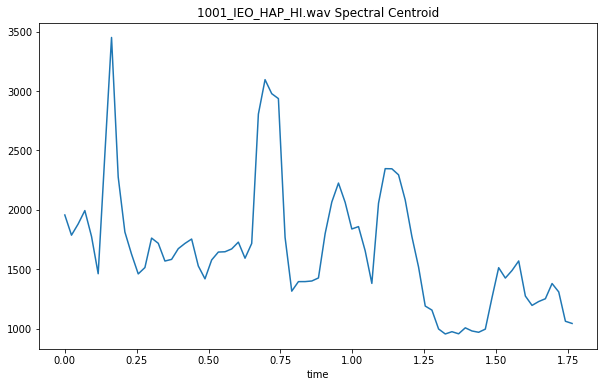

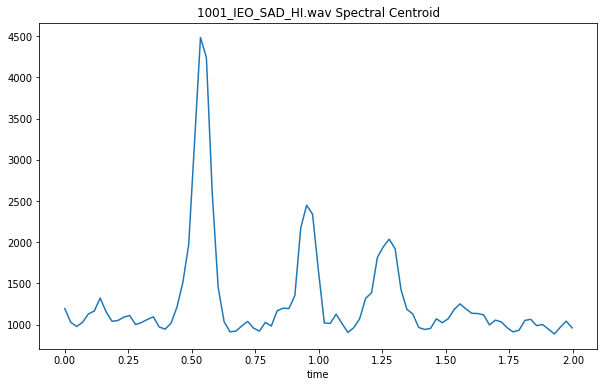

In [14]:
happy_spec_cntr = Spectral_Centroid(happy_audio_path, frame_size=2048, hop_len=512)
sad_spec_cntr = Spectral_Centroid(sad_audio_path, frame_size=2048, hop_len=512)

**Spectral Bandwidth Feature**


This is a function for extracting spectral bandwidth from a audio; It takes a path, frame size and hop length as inputs and return spectral bandwidth values as well as plotting the results.

In [15]:
def Spectral_Bandwidth(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(signal, n_fft=frame_size, hop_length=hop_len)[0]
    
    frames = range(0, len(spectral_bandwidth))
    times = librosa.frames_to_time(frames, hop_length=hop_len)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        #librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, spectral_bandwidth)
        plt.title(audio_path.split("/")[-1] + " Spectral Bandwidth")
        plt.xlabel('time')
        plt.show()
        
    return spectral_bandwidth

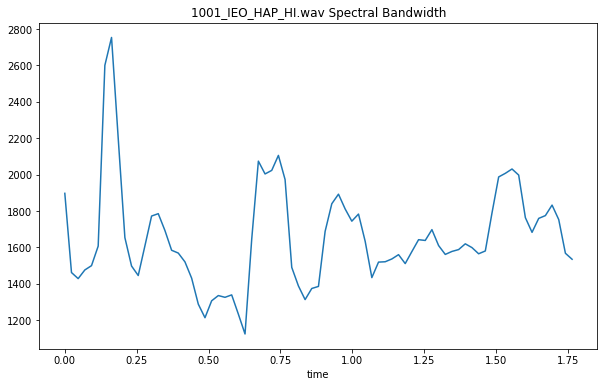

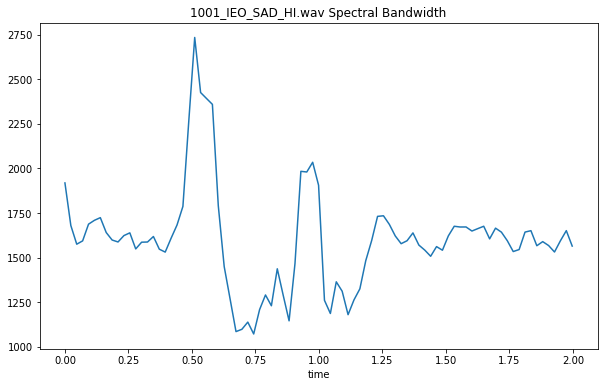

In [16]:
happy_spec_bw = Spectral_Bandwidth(happy_audio_path, frame_size=2048, hop_len=512)
sad_spec_bw = Spectral_Bandwidth(sad_audio_path, frame_size=2048, hop_len=512)

**Band Energy Ratio Feature**


This is a function for extracting band energy ratio from a audio; It takes a path, frame size, hop length and split frequency as inputs and return band energy ratio values as well as plotting the results.

In [17]:
def Band_Energy_Ratio(audio_path, frame_size, hop_len, split_frequency, visualise=True):
    signal, sample_rate = librosa.load(audio_path)   
    sig_stft = librosa.stft(signal, n_fft=frame_size, hop_length=hop_len)
    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / sig_stft.shape[0]
    split_frequency_bin = int(np.floor(split_frequency / frequency_delta_per_bin))
    
    power_spec = np.abs(sig_stft ** 2).T 
    band_energy_ration = []
    for freq_in_frame in power_spec:
        low_freq_sum = np.sum(freq_in_frame[:split_frequency_bin])
        high_freq_sum = np.sum(freq_in_frame[split_frequency_bin:])
        frame_BAR = low_freq_sum / high_freq_sum
        band_energy_ration.append(frame_BAR)
    
    band_energy_ration = np.array(band_energy_ration)
    
    frames = range(0, len(band_energy_ration))
    times = librosa.frames_to_time(frames, hop_length=hop_len)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        #librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, band_energy_ration)
        plt.title(audio_path.split("/")[-1] + " Band Energy Ratio")
        plt.xlabel('time')
        plt.show()
        
    return band_energy_ration

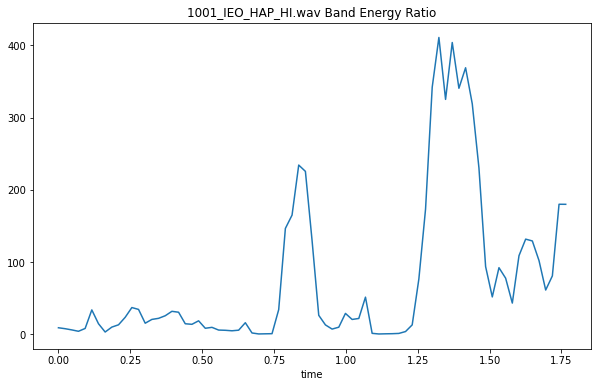

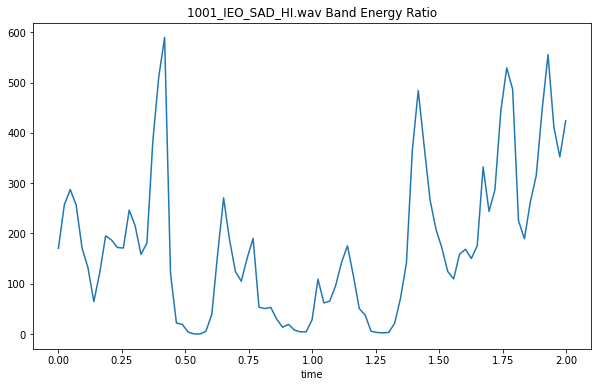

In [18]:
happy_BER = Band_Energy_Ratio(happy_audio_path, frame_size=2048, hop_len=512, split_frequency=2000)
sad_BER = Band_Energy_Ratio(sad_audio_path, frame_size=2048, hop_len=512, split_frequency=2000)

**Frequency Spectrogram Feature**


This is a function for extracting frequency spectrogram from a audio; It takes a path, frame size and hop length as inputs and return frequency spectrogram values as well as plotting the results.

In [19]:
def Frequency_Spectrogram(audio_path, frame_size, hop_len, visualise=True):
    signal, sr = librosa.load(audio_path)
    sig_stft = librosa.stft(signal, n_fft=frame_size, hop_length=hop_len)
    spec = np.abs(sig_stft)**2
    db_spec = librosa.power_to_db(spec)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        librosa.display.specshow(db_spec, hop_length=hop_len, x_axis='time', y_axis='log')
        plt.colorbar(format="%+2.f")
        plt.title(audio_path.split("/")[-1] + " Frequency Spectrogram")
        plt.show()
        
    return db_spec

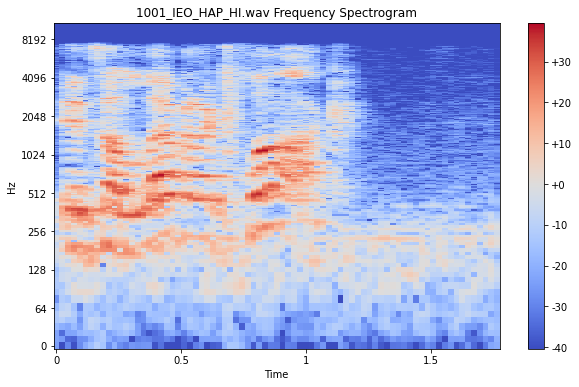

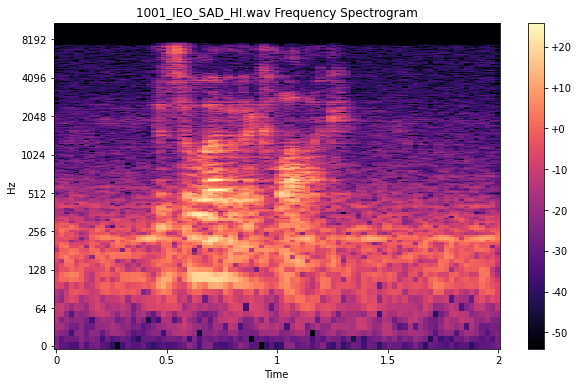

In [20]:
happy_freq_spec = Frequency_Spectrogram(happy_audio_path, frame_size=2048, hop_len=512)
sad_freq_spec = Frequency_Spectrogram(sad_audio_path, frame_size=2048, hop_len=512)

**Mel Spectrogram Feature**


This is a function for extracting mel spectrogram from a audio; It takes a path, frame size, hop length and mel-band as inputs and return mel spectrogram values as well as plotting the results.

In [21]:
def Mel_Spectrogram(audio_path, frame_size, hop_len, mel_band, visualise=True):
    signal, sr = librosa.load(audio_path)
    mel_spec = librosa.feature.melspectrogram(signal, n_fft=frame_size, hop_length=hop_len, n_mels=mel_band)
    db_mel_spec = librosa.power_to_db(mel_spec)
    
    if visualise == True:
        plt.figure(figsize=(10,6))
        librosa.display.specshow(db_mel_spec, hop_length=hop_len, x_axis='time', y_axis='mel')
        plt.colorbar(format="%+2.f")
        plt.title(audio_path.split("/")[-1] + " Mel Spectrogram")
        plt.show()
    
    return db_mel_spec

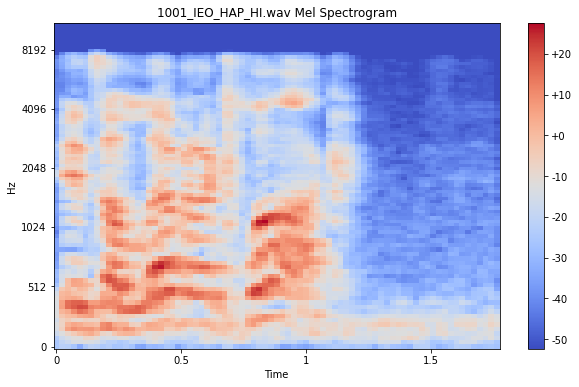

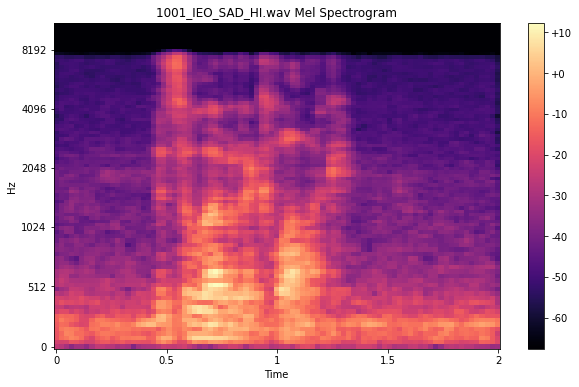

In [22]:
happy_mel_spec = Mel_Spectrogram(happy_audio_path, frame_size=2048, hop_len=512, mel_band=90)
sad_mel_spec = Mel_Spectrogram(sad_audio_path, frame_size=2048, hop_len=512, mel_band=90)

**Mel Frequency Cepstral Coefficients Feature**


This is a function for extracting mel frequency cepstral coefficients from a audio; It takes a path, frame size, hop length and number of mfcc as inputs and return mel spectrogram values. Also it calculate the first and second order derivative of mfcc values which which can be important. Finally it plots all these informatoin as a heatmap plot.

In [23]:
def Mel_Frequency_Cepstral_Coefficients(audio_path, frame_size, hop_len, mfcc_num, visualise=True):
    signal, sr = librosa.load(audio_path)
    
    mfcc_spec = librosa.feature.mfcc(signal, n_fft=frame_size, hop_length=hop_len, n_mfcc=mfcc_num)
    delta1_mfcc = librosa.feature.delta(mfcc_spec, order=1)
    delta2_mfcc = librosa.feature.delta(mfcc_spec, order=2)
        
    mfcc_features = np.concatenate((np.mean(mfcc_spec, axis=1), np.mean(delta1_mfcc, axis=1), np.mean(delta2_mfcc, axis=1)))
    
    if visualise == True:
        plt.figure(figsize=(10,16))
        
        plt.subplot(3,1,1)
        librosa.display.specshow(mfcc_spec, hop_length=hop_len, x_axis='time', y_axis='mel')
        plt.colorbar(format="%+2.f")
        plt.title(audio_path.split("/")[-1] + " MFCC Spectrogram")
        
        plt.subplot(3,1,2)
        librosa.display.specshow(delta1_mfcc, hop_length=hop_len, x_axis='time', y_axis='mel')
        plt.colorbar(format="%+2.f")
        plt.title(audio_path.split("/")[-1] + " Delta_1 MFCC Spectrogram")
        
        plt.subplot(3,1,3)
        librosa.display.specshow(delta2_mfcc, hop_length=hop_len, x_axis='time', y_axis='mel')
        plt.colorbar(format="%+2.f")
        plt.title(audio_path.split("/")[-1] + " Delta_2 MFCC Spectrogram")
        
        plt.show()
    
    return mfcc_features

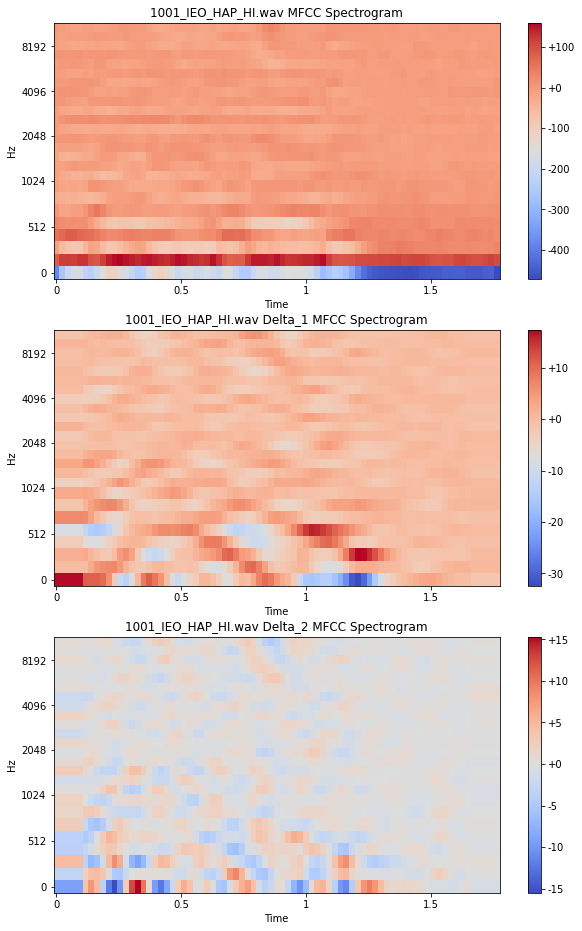

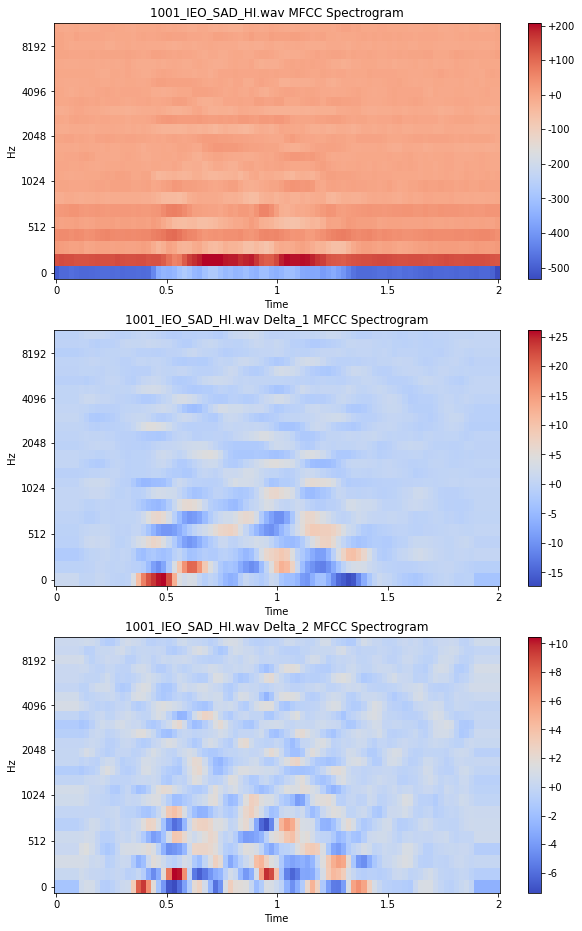

In [24]:
happy_mfcc = Mel_Frequency_Cepstral_Coefficients(happy_audio_path, frame_size=2048, hop_len=512, mfcc_num=25)
sad_mfcc = Mel_Frequency_Cepstral_Coefficients(sad_audio_path, frame_size=2048, hop_len=512, mfcc_num=25)

# Audio Features Extraction

Now it's time to extract the features of audios. Here we'll only use three features; MFCC, Zero Crossing Rate, Root Mean Square Energy. For this, we can use the functions we have defined before.

After that, we convert these features along with the name and class of the audios into a Pandas dataset and return it as the output of the function.

In [25]:
def audio_features(path, frame_size, hop_len, mfcc_num):
    audio_files = os.listdir(path)
    
    audios_mfcc = []
    audios_zcr = []
    audios_rmse = []
    audios_label = []
    for audio_name in audio_files:
        mfcc = Mel_Frequency_Cepstral_Coefficients(path + '/' + audio_name, frame_size=frame_size, hop_len=hop_len, mfcc_num=mfcc_num, visualise=False)
        zcr = np.mean(Zero_Crossing_Rate(path + '/' + audio_name, frame_size=frame_size, hop_len=hop_len, visualise=False))
        rmse = np.mean(Root_Mean_Square_Energy(path + '/' + audio_name, frame_size=frame_size, hop_len=hop_len, visualise=False))
        audios_mfcc.append(mfcc)
        audios_zcr.append(zcr)
        audios_rmse.append(rmse)
        label = audio_name.split("_")[2]
        audios_label.append(label)
          
    #Create a Pandas DataFrame Using Audio Features, Name and Label of audios
    au_features = np.column_stack((audios_mfcc, audios_zcr, audios_rmse))
    df = pd.DataFrame(au_features)
    df.insert(loc=0, column='name', value=audio_files)
    df['class'] = audios_label
    
    return df

Here, I use only Crema Dataset.

In [27]:
crema_path = '/kaggle/input/speech-emotion-recognition-en/Crema'

df = audio_features(crema_path, frame_size=2048, hop_len=512, mfcc_num=20)
df

,name,0,1,2,3,4,5,6,7,8,...,53,54,55,56,57,58,59,60,61,class
0,1028_TSI_DIS_XX.wav,-431.723633,133.943466,6.420338,77.241058,-16.627039,41.987717,-28.133764,12.872751,-12.549555,...,0.002927,-0.033148,0.055435,0.059897,0.034185,0.046170,0.022485,0.087412,0.009134,DIS
1,1075_IEO_HAP_LO.wav,-430.664764,138.970001,12.951284,49.049404,-15.531413,23.729923,-7.713432,9.417001,-5.410803,...,-0.038233,-0.080452,-0.027466,0.000525,0.077179,0.035661,-0.008353,0.042817,0.011402,HAP
2,1084_ITS_HAP_XX.wav,-418.777008,120.568153,10.039180,52.078938,-2.560579,23.874332,-16.733332,8.747866,-2.348809,...,0.028505,0.013762,0.021777,0.026365,-0.043230,0.016398,-0.002870,0.066026,0.018268,HAP
3,1067_IWW_DIS_XX.wav,-377.457092,128.414581,27.522411,44.877827,-5.609867,17.006210,-9.499171,-7.820161,-8.795966,...,-0.005006,-0.017587,-0.017826,0.025458,0.061756,-0.001913,-0.013201,0.049822,0.024260,DIS
4,1066_TIE_DIS_XX.wav,-395.567078,142.705704,4.679176,49.116158,-8.304835,22.757755,-18.521109,4.686079,-6.607634,...,0.030160,0.027371,0.015939,-0.014621,0.010951,0.011166,-0.015792,0.049155,0.015732,DIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,1060_IEO_ANG_MD.wav,-350.970703,141.154068,-8.722504,34.068142,-18.187168,19.180128,-10.820706,6.298551,-13.136872,...,-0.011883,-0.028163,0.009134,0.057334,0.042735,-0.071145,-0.076488,0.058572,0.023199,ANG
7438,1088_IWL_ANG_XX.wav,-334.293152,120.038910,13.581236,30.046171,-12.283121,11.209106,-12.831537,7.171808,-4.558558,...,-0.015745,0.031248,-0.009172,-0.000169,0.023678,0.002748,-0.011141,0.051894,0.057758,ANG
7439,1050_IOM_ANG_XX.wav,-345.641479,140.434875,11.814569,43.158955,3.537174,-1.015112,-12.521294,9.780389,-18.955666,...,-0.025326,0.000440,0.006617,0.021991,0.029505,0.010457,-0.010262,0.048912,0.051637,ANG
7440,1044_IWL_SAD_XX.wav,-434.442932,157.973953,7.683294,54.623325,-19.893824,24.668381,-12.447361,12.150620,-7.921892,...,-0.035116,0.039238,-0.007616,-0.039431,-0.001045,-0.003936,0.040492,0.040205,0.010682,SAD


Let's check the distribution of classes for avoiding imbalanced data problems:

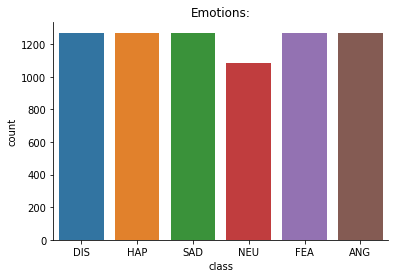

In [28]:
plt.title("Emotions:")
sns.countplot(x=df["class"])
sns.despine(top=True, right=True, left=False, bottom=False)

# Model Preprocessing

After features extracting, we can use one-hot encoding to transform label of classes; We have 6 classes which are disgust, happy, sad, neutral, fear and angry. Finally, we split data to train and test sets.

In [29]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

#Data Normalization
X = df.drop(['name','class'], axis=1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
#Expand The Shape Of Train Data To Feed Conv Layers
X = np.expand_dims(X, axis=-1)

#label one_hot encoding
y = np.array(df['class'])
y = np.reshape(y, (-1,1))
y = OneHotEncoder().fit_transform(y).toarray()

#splitting data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and Train the Model

We are going to build an ANN model and tuning its hyperparameters using keras tuner. To find best number of hidden layers and number of neurons in each one, I use keras tuner specifically 'Hyperband' search.

In [37]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],1)))
    model.add(layers.Conv1D(filters=hp.Choice('filters', [16,32,64]),
                            kernel_size=3,
                            activation='relu',
                            kernel_initializer='he_normal',
                            padding='same'))
    model.add(layers.MaxPooling1D(3, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    for i in range(hp.Int('num_layers', 3, 6)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=256, step=32),
                               activation='relu'))
        model.add(layers.BatchNormalization())
    model.add(layers.Dense(6, activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-3, 2e-3, 4e-3])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [38]:
tuner = kt.Hyperband(hypermodel=build_model,
                     objective='val_accuracy',
                     max_epochs=100,
                     factor=3,
                     hyperband_iterations=3,
                     seed=42,
                     overwrite=True)

2022-12-27 21:31:54.450008: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [39]:
tuner.search(x=X_train, 
             y=y_train, 
             validation_split=0.2, 
             callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)],
             epochs=30)

Trial 762 Complete [00h 00m 12s]
val_accuracy: 0.40218302607536316

Best val_accuracy So Far: 0.45843827724456787
Total elapsed time: 01h 40m 14s


Now we can get the best values for hyperparameters and fit the best model we've found.

In [47]:
best_hp = tuner.get_best_hyperparameters()[0]
final_model = tuner.hypermodel.build(best_hp)

final_model_history = final_model.fit(x=X_train,
                                      y=y_train,
                                      validation_split=0.2, 
                                      callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)],
                                      epochs=50)

Epoch 1/50
149/149 [==============================] - 3s 14ms/step - loss: 1.6055 - accuracy: 0.3553 - val_loss: 2.1998 - val_accuracy: 0.2401
Epoch 2/50
149/149 [==============================] - 1s 8ms/step - loss: 1.4310 - accuracy: 0.4206 - val_loss: 2.5070 - val_accuracy: 0.1730
Epoch 3/50
149/149 [==============================] - 1s 8ms/step - loss: 1.3943 - accuracy: 0.4370 - val_loss: 1.8818 - val_accuracy: 0.2485
Epoch 4/50
149/149 [==============================] - 1s 8ms/step - loss: 1.3551 - accuracy: 0.4532 - val_loss: 1.8140 - val_accuracy: 0.2922
Epoch 5/50
149/149 [==============================] - 1s 8ms/step - loss: 1.3243 - accuracy: 0.4687 - val_loss: 1.5415 - val_accuracy: 0.3955
Epoch 6/50
149/149 [==============================] - 1s 8ms/step - loss: 1.3000 - accuracy: 0.4885 - val_loss: 1.5511 - val_accuracy: 0.3795
Epoch 7/50
149/149 [==============================] - 1s 8ms/step - loss: 1.2574 - accuracy: 0.5080 - val_loss: 1.6266 - val_accuracy: 0.3644
Epoch

# Test the Model

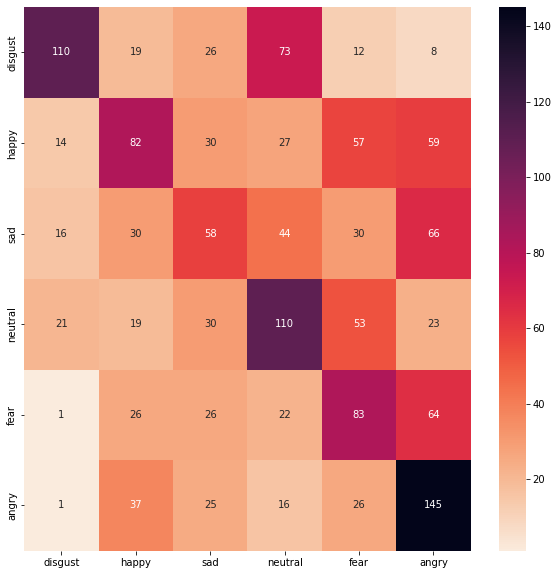

In [56]:
y_pred = model.predict(X_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.figure(figsize=(10,10))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['disgust', 'happy', 'sad', 'neutral', 'fear', 'angry'], yticklabels = ['disgust', 'happy', 'sad', 'neutral', 'fear', 'angry'])